In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

Plot $u(x)$ for N = 10, 100, 1000

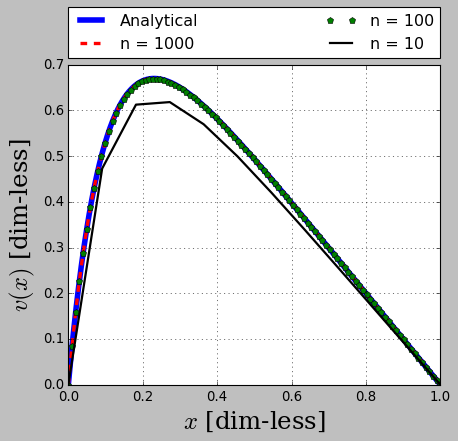

In [16]:
problem_sizes = np.logspace(1, 3, 3, endpoint = True).astype(int)
num_boundary_points = 2

plt.figure(figsize = (6, 5))
plt.style.use('classic')

for size in reversed(problem_sizes):
    full_system_size = size + num_boundary_points     # Account for boundary points
    x = np.zeros(full_system_size)
    numerical = np.zeros(full_system_size)
    analytical = np.zeros(full_system_size)

    with open("Result_{}_special.txt".format(size), "r") as results:
        for line_num, line_string in enumerate(results):
            if (line_num > 0):
                words = line_string.split()
                x[line_num] = float(words[0])
                x[-1]       = 1
                numerical[line_num] = float(words[1])
                numerical[-1]       = 0 
                analytical[line_num] = float(words[2])
                analytical[-1]       = 0

    if size == 1000:        
        plt.plot(x, analytical, 'b-',linewidth = 5, label = "Analytical")
        plt.plot(x, numerical, 'r--', linewidth = 3,
        label = "n = {}".format(full_system_size-num_boundary_points))
    elif size == 10:
        plt.plot(x, numerical, 'k-', linewidth = 2,
        label = "n = {}".format(full_system_size-num_boundary_points))
    else:
        plt.plot(x, numerical, 'gp', linewidth = 2,
        label = "n = {}".format(full_system_size-num_boundary_points))     

plt.xlabel("$x$ [dim-less]", fontname = "serif", fontsize = 22)
plt.ylabel("$v(x)$ [dim-less]", fontname = "serif", fontsize = 22)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('Results_special.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

Relative error as a function of grid points

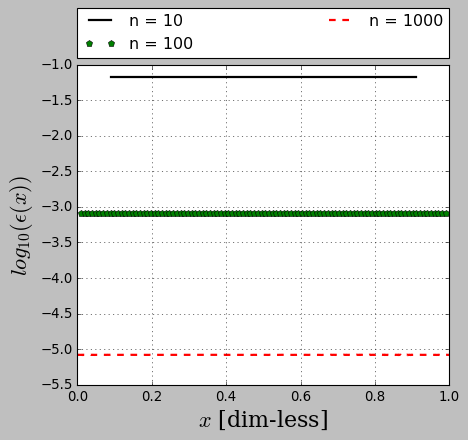

In [20]:
plt.figure(figsize = (6, 5))
plt.style.use('classic')

for size in problem_sizes:
    full_system_size = size     
    x          = np.zeros(full_system_size)
    numerical  = np.zeros(full_system_size)
    analytical = np.zeros(full_system_size)
    rerr       = np.zeros(full_system_size)
    
    with open("Result_{}_general.txt".format(size), "r") as results:
        for line_num, line_string in enumerate(results):
            if (line_num > 0):
                words = line_string.split()
                x[line_num-1] = float(words[0])

                numerical[line_num-1]  = float(words[1])
                analytical[line_num-1] = float(words[2])
                rerr[line_num-1]       = np.log10(np.abs((analytical[line_num-1]-numerical[line_num-1])/analytical[line_num-1]))

    if size == 1000:        
        plt.plot(x, rerr, 'r--', linewidth = 2,
        label = "n = {}".format(full_system_size))
    elif size == 10:
        plt.plot(x, rerr, 'k-', linewidth = 2,
        label = "n = {}".format(full_system_size))
    else:
        plt.plot(x, rerr, 'gp', linewidth = 2,
        label = "n = {}".format(full_system_size))     

plt.xlabel("$x$ [dim-less]", fontname = "serif", fontsize = 20)
plt.ylabel("$log_{10}(\epsilon(x))$", fontname = "serif", fontsize = 20)
plt.legend()
plt.grid()
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',ncol=2, mode="expand", borderaxespad=0.)
plt.savefig('RelativeError_general.png', dpi=300, transparent=False, bbox_inches='tight')

plt.show()

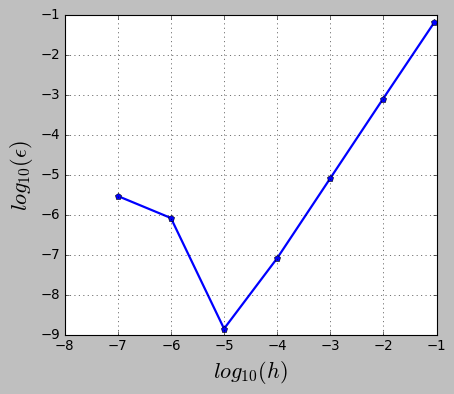

In [21]:
problem_sizes = np.logspace(1, 7, 7, endpoint = True).astype(int)
step_sizes    = 1.0/(problem_sizes + 1)
max_err_list  = list()

for i in range(len(problem_sizes)):
    max_err = 0.0

    with open("Result_{}_general.txt".format(problem_sizes[i]), "r") as result_file:
        for line_num, line_string in enumerate(result_file):
            if (line_num > 1 and line_num < problem_sizes[i] + 2):
                words = line_string.split()
                rel_err = abs(float(words[-1]))

                if (rel_err > max_err):
                    max_err = rel_err

        max_err_list.append(max_err)

plt.figure(figsize = (6, 5))
plt.style.use('classic')
plt.plot(np.log10(step_sizes), np.log10(max_err_list), 'b-p', linewidth = 2)
#plt.loglog()
plt.xlabel("$log_{10}(h)$", fontname = "serif", fontsize = 20)
plt.ylabel("$log_{10}(\epsilon)$", fontname = "serif", fontsize = 20)
plt.grid()
plt.savefig('Precision_general.png', dpi=300, transparent=False, bbox_inches='tight')
plt.show()

In [17]:
print(np.log10(max_err_list))
print(np.log10(step_sizes))      

[-1.17969778 -3.08803683 -5.08005155 -7.07928512 -8.8429723  -6.07547368
 -5.52523004]
[-1.04139269 -2.00432137 -3.00043408 -4.00004343 -5.00000434 -6.00000043
 -7.00000004]
